####  

#  청년몰 최적입지선정 예측모델

###  

In [454]:
import pandas as pd 
import folium # 지도 불러오기 위한 라이브러리
import matplotlib.pyplot as plt #pie 그래프 라이브러리
import plotly.express as px #버블차트 라이브러리
import seaborn as sns #matplotlib 확장 라이브러리(더 이쁘기 시각화하기 위해)
import matplotlib.font_manager as fm #글자 깨짐을 해결하기 위한 라이브|러리
from matplotlib import font_manager, rc #글자 깨짐을 해결하기 위한 라이브러리2
from sklearn import linear_model #선형회귀분석을 위해 sklearn(사이킷런)을 사용하기 위한 라이브러리 
import numpy as np

In [455]:
#plot 한글 깨짐
plt.rc('font', family='Malgun Gothic')

#막대그래프 한글 깨짐
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [456]:
data = pd.read_csv("C:/최종모델용/youth_mall.csv", encoding = 'cp949')
print(data.shape)
data.head()

(38, 24)


,시장명,청년몰명칭,store_num,휴폐업,sales_per_store,MONEY,salesrate,x,y,Bus_st_num,...,ur_park_num,Cul_hall_n,Mart_num_1,parking_num,parking_car_num,stor_cnt,residnt_cnt_sum,mkt_cnt_sum,stor_cnt_sum,person_mkt_cnt
0,김제전통시장,아리락,10,1,122.700000,1227,90.000000,35.801143,126.884466,20,...,0,1,0,24,1101,65,82623,4,230,359
1,속초중앙시장,갯배st,20,0,107.300000,"2,146",100.000000,38.202650,128.592290,20,...,0,1,1,8,586,400,82636,2,750,110
2,삼례시장,삼삼오오,10,4,106.800000,1068,60.000000,35.910349,127.073165,31,...,0,1,0,7,748,43,91445,6,293,312
3,정선사북시장,별애별청년몰,10,0,102.500000,1025,100.000000,37.228133,128.817946,10,...,0,0,0,9,649,60,36937,4,555,67
4,통복시장,청년숲,19,2,92.526316,"1,758",89.473684,36.997224,127.083970,95,...,0,1,0,25,1804,625,534343,5,1283,416


In [457]:
data.columns

Index(['시장명', '청년몰명칭', 'store_num', '휴폐업', 'sales_per_store', 'MONEY',
       'salesrate', 'x', 'y', 'Bus_st_num', 'Ur_rail_nu', 'Bus_te_num',
       'spot_num_3', 'univ_num_1', 'ur_park_num', 'Cul_hall_n', 'Mart_num_1',
       'parking_num', 'parking_car_num', 'stor_cnt', 'residnt_cnt_sum',
       'mkt_cnt_sum', 'stor_cnt_sum', 'person_mkt_cnt'],
      dtype='object')

In [458]:
#필요 열 추출
num_data = data[['store_num', 'sales_per_store', 'salesrate', 'Bus_st_num', 'Ur_rail_nu', 
                 'Bus_te_num', 'spot_num_3', 'univ_num_1','ur_park_num', 'Cul_hall_n', 'Mart_num_1', 
            'parking_num', 'parking_car_num','stor_cnt', 'residnt_cnt_sum', 'mkt_cnt_sum', 'stor_cnt_sum', 'person_mkt_cnt']]
num_data.head()

,store_num,sales_per_store,salesrate,Bus_st_num,Ur_rail_nu,Bus_te_num,spot_num_3,univ_num_1,ur_park_num,Cul_hall_n,Mart_num_1,parking_num,parking_car_num,stor_cnt,residnt_cnt_sum,mkt_cnt_sum,stor_cnt_sum,person_mkt_cnt
0,10,122.700000,90.000000,20,0,2,3,0,0,1,0,24,1101,65,82623,4,230,359
1,20,107.300000,100.000000,20,0,2,4,0,0,1,1,8,586,400,82636,2,750,110
2,10,106.800000,60.000000,31,0,0,2,1,0,1,0,7,748,43,91445,6,293,312
3,10,102.500000,100.000000,10,0,0,1,0,0,0,0,9,649,60,36937,4,555,67
4,19,92.526316,89.473684,95,1,2,1,0,0,1,0,25,1804,625,534343,5,1283,416


In [459]:
data_col = num_data.columns
data_col

Index(['store_num', 'sales_per_store', 'salesrate', 'Bus_st_num', 'Ur_rail_nu',
       'Bus_te_num', 'spot_num_3', 'univ_num_1', 'ur_park_num', 'Cul_hall_n',
       'Mart_num_1', 'parking_num', 'parking_car_num', 'stor_cnt',
       'residnt_cnt_sum', 'mkt_cnt_sum', 'stor_cnt_sum', 'person_mkt_cnt'],
      dtype='object')

### 상관계수

In [460]:
corr = num_data.corr()
corr

,store_num,sales_per_store,salesrate,Bus_st_num,Ur_rail_nu,Bus_te_num,spot_num_3,univ_num_1,ur_park_num,Cul_hall_n,Mart_num_1,parking_num,parking_car_num,stor_cnt,residnt_cnt_sum,mkt_cnt_sum,stor_cnt_sum,person_mkt_cnt
store_num,1.000000,-0.438366,-0.028297,0.047493,0.037231,-0.118202,-0.002767,0.063075,0.265964,0.154915,0.196400,0.049037,0.019373,0.115404,0.111732,0.024442,-0.004140,-0.027648
sales_per_store,-0.438366,1.000000,0.080194,0.291140,0.195112,0.292421,0.473603,-0.017551,-0.225859,-0.133438,-0.553287,0.307491,0.334959,-0.047747,-0.289580,-0.244384,-0.126068,0.091024
salesrate,-0.028297,0.080194,1.000000,-0.078239,-0.081718,0.286328,-0.013904,-0.142871,0.142943,-0.019465,0.172373,-0.018664,0.032073,-0.159273,0.203798,-0.142332,-0.121643,0.175873
Bus_st_num,0.047493,0.291140,-0.078239,1.000000,0.599837,0.030022,0.286621,-0.006807,-0.019497,0.190004,-0.144837,0.623485,0.695407,0.111209,0.208673,0.223558,0.243738,0.073779
Ur_rail_nu,0.037231,0.195112,-0.081718,0.599837,1.000000,-0.222673,0.473056,0.083953,-0.146138,0.425877,0.068669,0.577918,0.762936,0.052701,-0.133928,0.460433,0.600391,-0.155219
Bus_te_num,-0.118202,0.292421,0.286328,0.030022,-0.222673,1.000000,-0.184897,-0.210943,0.160782,-0.066855,-0.058462,-0.105170,-0.101114,0.389511,-0.042755,-0.393670,-0.271166,-0.089342
spot_num_3,-0.002767,0.473603,-0.013904,0.286621,0.473056,-0.184897,1.000000,0.105507,-0.036763,0.063693,-0.113622,0.527206,0.416107,0.033669,-0.156331,0.271545,0.399806,-0.132962
univ_num_1,0.063075,-0.017551,-0.142871,-0.006807,0.083953,-0.210943,0.105507,1.000000,-0.091747,0.440836,-0.262432,-0.132861,-0.126630,-0.182893,0.100713,0.007059,-0.028046,0.027430
ur_park_num,0.265964,-0.225859,0.142943,-0.019497,-0.146138,0.160782,-0.036763,-0.091747,1.000000,0.036401,0.096962,-0.195005,-0.209510,0.043767,0.040645,0.058911,0.076345,-0.033421
Cul_hall_n,0.154915,-0.133438,-0.019465,0.190004,0.425877,-0.066855,0.063693,0.440836,0.036401,1.000000,-0.032580,0.142655,0.292509,0.051561,0.079066,0.332859,0.376095,-0.120249


C:\Users\User\python\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\python\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


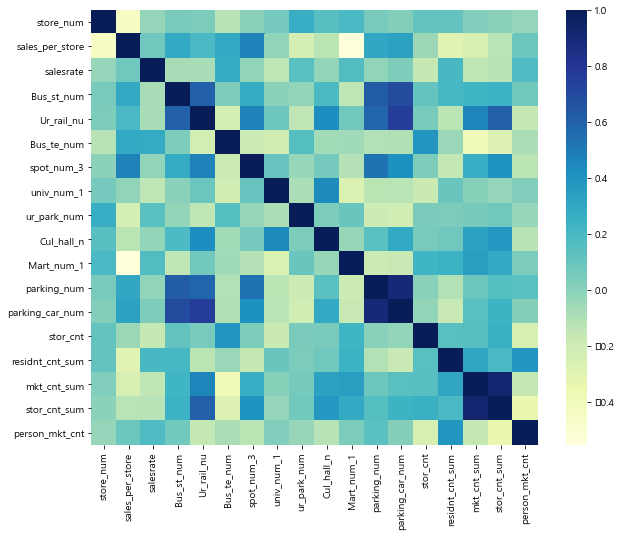

In [461]:
#상관계수에 따른 히트맵
plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, cmap='YlGnBu')
#plt.show()

In [462]:
# 이상치 제거 전 boxplot
#for i in data_col:
#    plt.boxplot(num_data[i])
#    plt.xlabel(i)
#    plt.show()

In [463]:
#이상치 제거
#num_data = num_data[num_data['sales_per_store']<120]
#num_data = num_data[num_data['salesrate']>40]
#num_data = num_data[num_data['Bus_st_num']<100]
#num_data = num_data[num_data['spot_num_3']<5]
#num_data = num_data[num_data['parking_num']<60]
#num_data = num_data[num_data['parking_car_num']<4000]
#num_data = num_data[num_data['stor_cnt']<720]
#num_data = num_data[num_data['mkt_cnt_sum']<45]
#num_data = num_data[num_data['stor_cnt_sum']<8000]
#num_data = num_data[num_data['person_mkt_cnt']<1000]

In [464]:
# 필요 변수 추출 - R studio 사용 
# AIC = 194.48
# 기존 이상치 제거 후 필요 변수 추출 -> 데이터 값이 너무 사라져서
# 필요 변수 추출 후 기준 이상치 제거

XY_data = num_data[['store_num', 'Bus_te_num', 'spot_num_3', 'ur_park_num', 'parking_num', 'Cul_hall_n',
                  'Mart_num_1', 'parking_car_num', 'residnt_cnt_sum','person_mkt_cnt', 'sales_per_store']]
XY_data_col = XY_data.columns

### boxplot 으로 이상치 확인

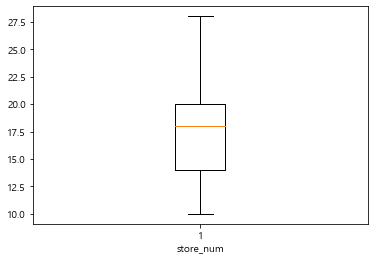

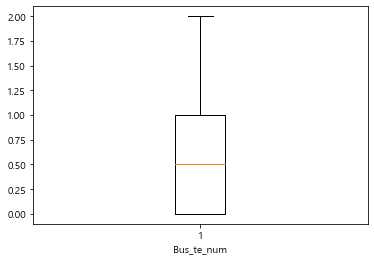

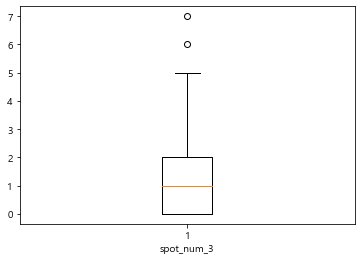

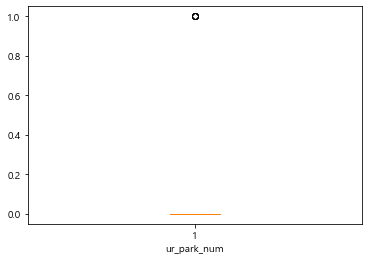

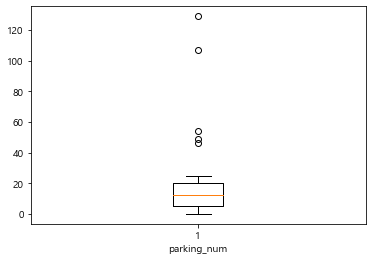

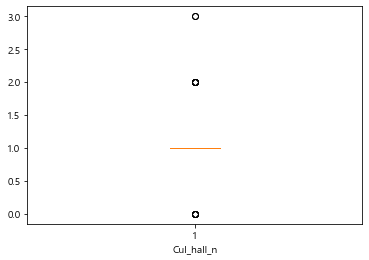

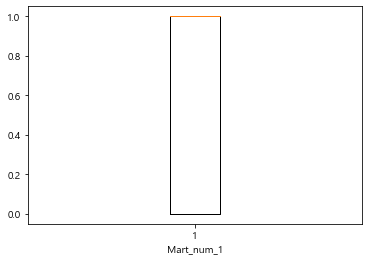

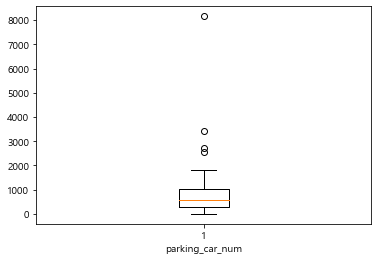

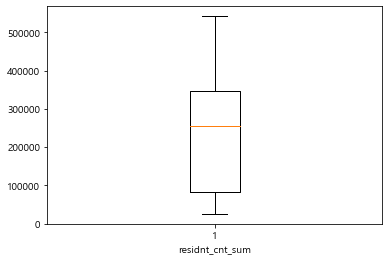

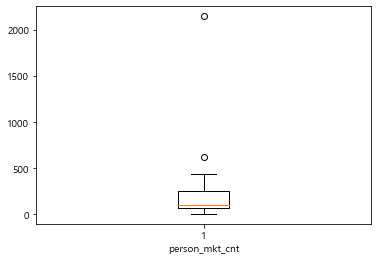

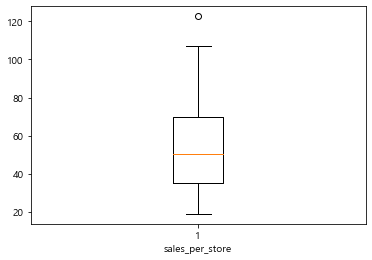

In [465]:
for i in XY_data_col:
    plt.boxplot(XY_data[i])
    plt.xlabel(i)
    plt.show()

In [466]:
# 나온 변수들에 대해서만 이상치 제거
XY_data = XY_data[XY_data['parking_num']<60]
XY_data = XY_data[XY_data['parking_car_num']<4000]
XY_data = XY_data[XY_data['person_mkt_cnt']<1000]

In [467]:
XY_data.shape # 이상치 제거 후 38개 => 35개

(35, 11)

In [468]:
# 독립변수, 종속변수 분리
X_data = XY_data[['store_num', 'Bus_te_num', 'spot_num_3', 'ur_park_num', 'parking_num', 'Cul_hall_n',
                  'Mart_num_1', 'parking_car_num','residnt_cnt_sum', 'person_mkt_cnt']]
Y_data = XY_data['sales_per_store']

In [469]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X_data), y = Y_data)
prediction = linear_regression.predict(X = pd.DataFrame(X_data))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  80.89388142823682
b value =  [-9.27748926e-01  1.36863863e+01  1.05878041e+01 -1.17365876e+01
 -4.69638817e-01 -8.97387358e+00 -2.76728110e+01  9.90619210e-03
 -1.75740803e-05  4.34539393e-03]


In [470]:
YY_data = np.array(Y_data)

In [471]:
prediction

array([121.5220626 ,  96.48986706,  87.68918787,  84.04857317,
        90.80025222, 111.31773521,  75.93978471,  74.86816902,
        71.46189061,  71.43466556,  58.37395818,  60.17078777,
        63.57547625,  35.54137487,  49.99413038,  40.78775861,
        53.32328375,  50.32758827,  41.25053304,  37.77751792,
        34.26787108,  44.37766782,  43.75759967,  53.97239224,
        18.83668209,  33.11729455,  44.35931846,  36.75750004,
        39.47501628,  41.50568535,  29.52432304,  32.15811082,
        18.64796211,  27.52482567,   8.61631458])

###  

## [ 다중회귀분석 ]

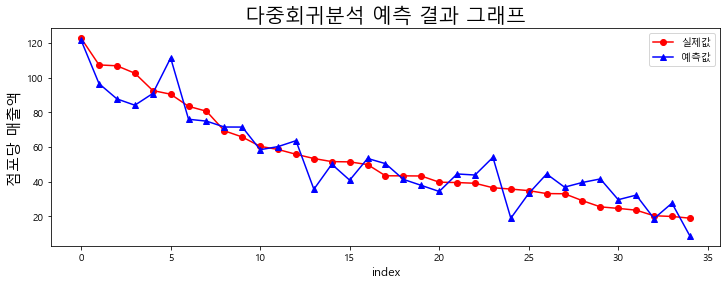

In [472]:
fig = plt.figure( figsize = (12, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(YY_data[:35], marker='o', color='red', label='실제값')
chart.plot(prediction[:35], marker='^', color='blue', label='예측값')
chart.set_title('다중회귀분석 예측 결과 그래프', size=20)
plt.xlabel('index', size=12)  #횟수 별로 의미없는 말인듯
plt.ylabel('점포당 매출액', size=15)
plt.legend(loc = 'best') 
plt.show()

###  정확도 검증 

In [473]:
# 적합도 검증 - 잔차
residuals = Y_data-prediction
residuals.describe()

count    3.500000e+01
mean    -4.060244e-15
std      1.004663e+01
min     -2.091774e+01
25%     -6.369095e+00
50%      1.177937e+00
75%      5.571274e+00
max      1.911081e+01
Name: sales_per_store, dtype: float64

In [474]:
# 적합도 검증 - 결정계수
SSE = (residuals**2).sum()
SST = ((Y_data-Y_data.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.8739313575331313


In [475]:
#score 계산
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X_data), y=Y_data))

score =  0.8739313575331313


C:\Users\User\python\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\python\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


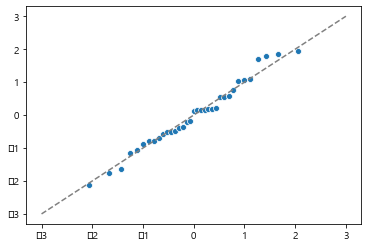

In [476]:
# 잔차 정규성
import scipy.stats
sr = scipy.stats.zscore(residuals)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

In [477]:
scipy.stats.shapiro(residuals)

(0.9758761525154114, 0.6225992441177368)

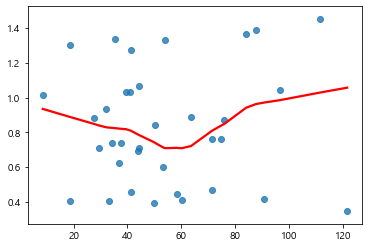

In [478]:
#잔차 등분산성
sns.regplot(prediction, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

####  

####  

## [ 5가지 ML 모델 생성 ]

###  

In [479]:
# 필요한 라이브러리 설치
from xgboost import plot_importance
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from xgboost import XGBRegressor
import math
import warnings

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

#RandomForestClassifier 클래스를 import
from sklearn.ensemble import RandomForestRegressor

In [480]:
# root mean square log error
def rmsle(y_pred, y_test) :
    assert len(y_test) == len(y_pred)
    return np.sqrt(mean_squared_log_error(y_pred, y_test))

####  

In [481]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.25, random_state = 11)

In [482]:
print(X_train.shape)
print(X_test.shape)

(26, 10)
(9, 10)


### Random Forest

In [483]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### XGBoost

In [484]:
xgb = XGBRegressor(n_estimators=400, learning_rate = 0.01, max_depth = 5)
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Ridge & Lasso

In [485]:
ridge_alpha = 0.1
lasso_alpha = 0.01

ridge = Ridge(alpha = ridge_alpha).fit(X_train,Y_train)
lasso = Lasso(alpha = lasso_alpha).fit(X_train, Y_train)

### Decision Tree

In [486]:
from sklearn.tree import DecisionTreeRegressor
Decision = DecisionTreeRegressor(max_depth=7)
Decision.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [487]:
# RMSLE는 0에 가까울수록
# R_squared는 1에 가까울수록  .. 음수는 모델 잘못된것임
# 예측성능평가가 좋은 것임

           model     RMSLE  R_squared   Accuracy
0  Random Forest  0.199342   0.670811  80.065780
1        XGBoost  0.432220   0.297140  56.778023
2          Ridge  0.216679   0.581045  78.332058
3          Lasso  0.214256   0.593608  78.574353
4  Decision Tree  0.679698  -1.807056  32.030151




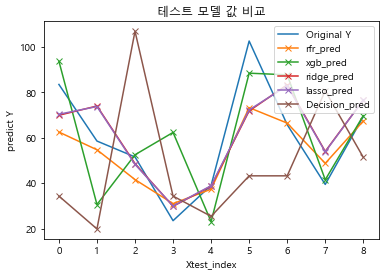

In [488]:
rfr_pred = rfr.predict(X_test)
xgb_pred = xgb.predict(X_test)
ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)
Decision_pred = Decision.predict(X_test)

#r2_score
rfr_r2, xgb_r2 = r2_score(Y_test,rfr_pred), r2_score(Y_test,xgb_pred)
ridge_r2, lasso_r2, Decision_r2 = r2_score(Y_test,ridge_pred), r2_score(Y_test,lasso_pred), r2_score(Y_test, Decision_pred)

#rmsle
rfr_RMSLE, xgb_RMSLE = rmsle(Y_test, rfr_pred), rmsle(Y_test, xgb_pred)
ridge_RMSLE, lasso_RMSLE, Decision_RMSLE = rmsle(Y_test,ridge_pred), rmsle(Y_test,lasso_pred), rmsle(Y_test, Decision_pred)

my_prediction = {}
from pandas import DataFrame
Model_name = ['Random Forest','XGBoost', 'Ridge','Lasso','Decision Tree']
Model_RMSLE = [rfr_RMSLE, xgb_RMSLE, ridge_RMSLE, lasso_RMSLE, Decision_RMSLE]
Model_R2 = [rfr_r2, xgb_r2, ridge_r2, lasso_r2, Decision_r2]
Model_Accuracy = [100-rfr_RMSLE*100, 100-xgb_RMSLE*100, 100-ridge_RMSLE*100, 100-lasso_RMSLE*100, 100-Decision_RMSLE*100]
my_prediction = {'model':Model_name, 'RMSLE':Model_RMSLE,'R_squared': Model_R2, 'Accuracy' : Model_Accuracy}
df = DataFrame(my_prediction)
print(df)
print('\n')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(Y_test)), Y_test, '-', label="Original Y")
ax.plot(range(len(Y_test)), rfr_pred, '-x', label="rfr_pred")
ax.plot(range(len(Y_test)), xgb_pred, '-x', label="xgb_pred")
ax.plot(range(len(Y_test)), ridge_pred, '-x', label="ridge_pred")
ax.plot(range(len(Y_test)), lasso_pred, '-x', label="lasso_pred")
ax.plot(range(len(Y_test)), Decision_pred, '-x', label="Decision_pred")
plt.title('테스트 모델 값 비교')
plt.xlabel('Xtest_index')
plt.ylabel('predict Y')


plt.legend(loc='upper right')
plt.show()

##  

### ML 모델 정확도 비교

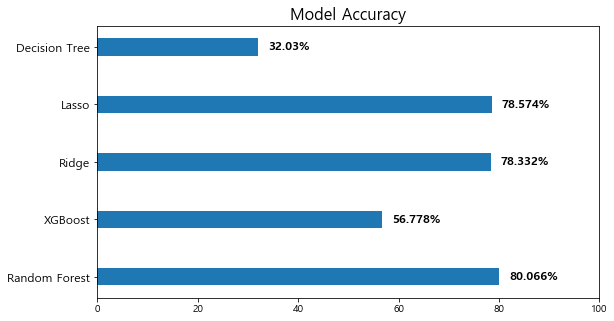

In [489]:
plt.figure(figsize=(9, 5))
ax = plt.subplot()    
ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(df['model'], fontsize=12)
bars = ax.barh(np.arange(len(df)), df['Accuracy'], height=0.3)
for i, v in enumerate(Model_Accuracy):
    ax.text(v + 2, i, str(round(v, 3))+'%', color='k', fontsize=12, fontweight='bold', verticalalignment='center')
plt.title('Model Accuracy', fontsize=16)
plt.xlim(0,100)
#plt.xlim(min_, max_)    
plt.show()

###  

### => 정확도가 가장높은 RandomForest Regression 을 최종모델로 채택

###  

## [ Model Test ]

### 전통시장 데이터에 모델 대입

In [490]:
market_data = pd.read_csv("C:/최종모델용/traditional_mall.csv", encoding = 'cp949')
market_data.head()

,시장명,최종주소,X,Y,store_num,Bus_st_num,Ur_rail_nu,Bus_te_num,spot_num_3,univ_num_1,ur_park_num,Cul_hall_n,Mart_num_1,parking_num,parking_car_num,stor_cnt,residnt_cnt_sum,mkt_cnt_sum,stor_cnt_sum,person_mkt_cnt
0,(유)문경시중앙시장,경상북도 문경시 중앙로 87,128.197217,36.593648,38,22,0,0,0,0,0,1,1,10,951,40,71213,11,775,92
1,(주)서시장,전라남도 여수시 좌수영로 16-6,127.728612,34.741776,209,83,0,1,4,0,0,1,0,1,241,191,280549,30,3164,89
2,(주)신정시장,울산광역시 남구 월평로47번길 7,129.310298,35.542318,105,79,0,1,0,0,0,2,1,4,240,94,320716,18,2370,135
3,(주)야음시장,울산광역시 남구 야음동 815-22,129.331225,35.524098,90,82,0,2,0,0,0,1,1,1,103,85,320716,18,2370,135
4,(주)여수수산시장,전라남도 여수시 여객선터미널길 24,127.731736,34.738141,115,95,0,1,4,0,0,1,1,4,190,124,280549,30,3164,89


In [491]:
#전통시장 데이터에서 같은 열 뽑기(=X_data2)
X_data2 = market_data[['store_num', 'Bus_te_num', 'spot_num_3', 'ur_park_num', 'parking_num', 'Cul_hall_n',
                  'Mart_num_1', 'parking_car_num', 'residnt_cnt_sum', 'person_mkt_cnt']]
X_data2.shape

(1262, 10)

###  

In [492]:
#모델에 전통시장 대입
pred2 = rfr.predict(X_data2)

In [493]:
pred2

array([38.30344334, 58.76810741, 28.04068432, ..., 39.36209745,
       37.01777572, 27.11124089])

In [494]:
#기존 전통시장 데이터에 매출액 열추가
market_data['매출액'] = pred2
market_data.head()

,시장명,최종주소,X,Y,store_num,Bus_st_num,Ur_rail_nu,Bus_te_num,spot_num_3,univ_num_1,...,Cul_hall_n,Mart_num_1,parking_num,parking_car_num,stor_cnt,residnt_cnt_sum,mkt_cnt_sum,stor_cnt_sum,person_mkt_cnt,매출액
0,(유)문경시중앙시장,경상북도 문경시 중앙로 87,128.197217,36.593648,38,22,0,0,0,0,...,1,1,10,951,40,71213,11,775,92,38.303443
1,(주)서시장,전라남도 여수시 좌수영로 16-6,127.728612,34.741776,209,83,0,1,4,0,...,1,0,1,241,191,280549,30,3164,89,58.768107
2,(주)신정시장,울산광역시 남구 월평로47번길 7,129.310298,35.542318,105,79,0,1,0,0,...,2,1,4,240,94,320716,18,2370,135,28.040684
3,(주)야음시장,울산광역시 남구 야음동 815-22,129.331225,35.524098,90,82,0,2,0,0,...,1,1,1,103,85,320716,18,2370,135,40.114035
4,(주)여수수산시장,전라남도 여수시 여객선터미널길 24,127.731736,34.738141,115,95,0,1,4,0,...,1,1,4,190,124,280549,30,3164,89,50.903187


23.13303655769999
93.56757478709999


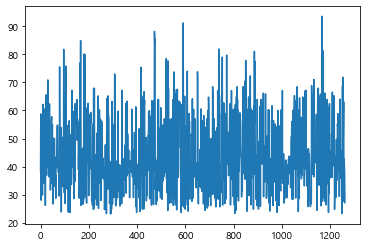

In [495]:
print(min(pred2))
print(max(pred2))
plt.plot(pred2)

(array([201., 216., 357., 142., 141., 138.,  38.,  16.,  10.,   3.]),
 array([23.13303656, 30.17649038, 37.2199442 , 44.26339803, 51.30685185,
        58.35030567, 65.3937595 , 72.43721332, 79.48066714, 86.52412096,
        93.56757479]),
 <a list of 10 Patch objects>)

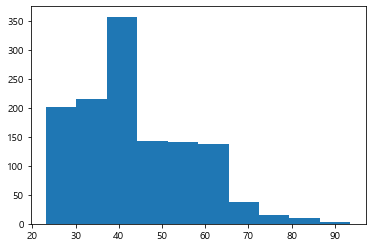

In [496]:
plt.hist(pred2)

####  

### 최종 예측모델 저장

In [497]:
market_data.to_csv('C:/최종모델용/new1.csv',index=False)

###  